# Ejercicio Final - Parte 1: exploración visual de datos

En este emocionante cierre de curso, nos embarcaremos en un ejercicio final aplicando las buenas prácticas recomendadas en nuestro recorrido. El desafío que enfrentamos es intrigante: tenemos dos archivos CSV que contienen datos de temperatura registrados por torres de termopares, cada una con 12 puntos de medición, y nuestro objetivo es graficar la temperatura promedio de cada conjunto de 12 puntos cada 10 minutos a lo largo del tiempo. Este problema se divide en tres videos, y en esta primera parte nos enfocaremos en una exploración rápida de los datos para decidir cómo limpiarlos al importarlos. En los siguientes videos, importaremos los datos, los limpiaremos y los prepararemos para el análisis, y finalmente, en el tercer video, cargaremos los datos y obtendremos la gráfica deseada. 

# Problema
Dos torres con 12 termopares cada una. Se desea calcular el promedio cada 10 minutos de las temperaturas de cada torre y compararlas en una gráfica de las 12 a las 17 horas.

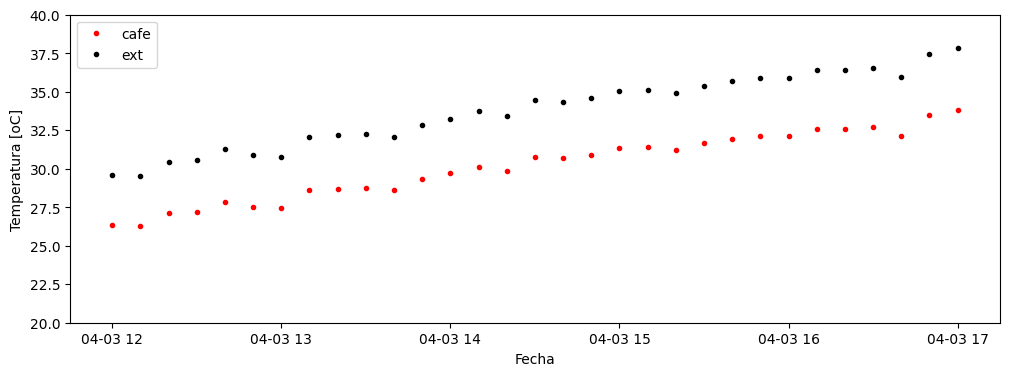

In [1]:
import pandas as pd

In [24]:
f = '../data/termopares/centro_cafeteria.csv'
Tcafe = pd.read_csv(f,index_col=0,parse_dates=True)

f = '../data/termopares/exterior.csv'
Text = pd.read_csv(f,index_col=0,parse_dates=True)


In [25]:
Tcafe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1632 entries, 2023-04-03 10:48:00 to 2023-04-04 13:59:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMP1    471 non-null    float64
 1   TMP2    471 non-null    float64
 2   TMP3    471 non-null    float64
 3   TMP4    471 non-null    float64
 4   TMP5    471 non-null    float64
 5   TMP6    471 non-null    float64
 6   TMP7    471 non-null    float64
 7   TMP8    471 non-null    float64
 8   TMP11   454 non-null    float64
 9   TMP12   454 non-null    float64
 10  TMP10   454 non-null    float64
 11  TMP9    454 non-null    float64
dtypes: float64(12)
memory usage: 165.8 KB


In [26]:
Text.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1619 entries, 2023-04-03 11:01:00 to 2023-04-04 13:59:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMP1    1619 non-null   float64
 1   TMP10   1619 non-null   float64
 2   TMP11   1619 non-null   float64
 3   TMP12   1619 non-null   float64
 4   TMP2    1619 non-null   float64
 5   TMP3    1619 non-null   float64
 6   TMP4    1619 non-null   float64
 7   TMP5    1619 non-null   float64
 8   TMP6    1619 non-null   float64
 9   TMP7    1619 non-null   float64
 10  TMP8    1619 non-null   float64
 11  TMP9    1619 non-null   float64
dtypes: float64(12)
memory usage: 164.4 KB


<Axes: xlabel='ts'>

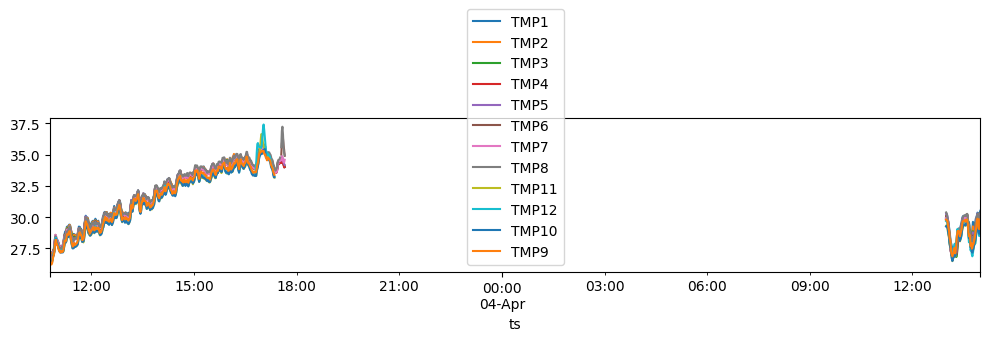

In [27]:
Tcafe.plot(figsize=(12,2))

<Axes: xlabel='ts'>

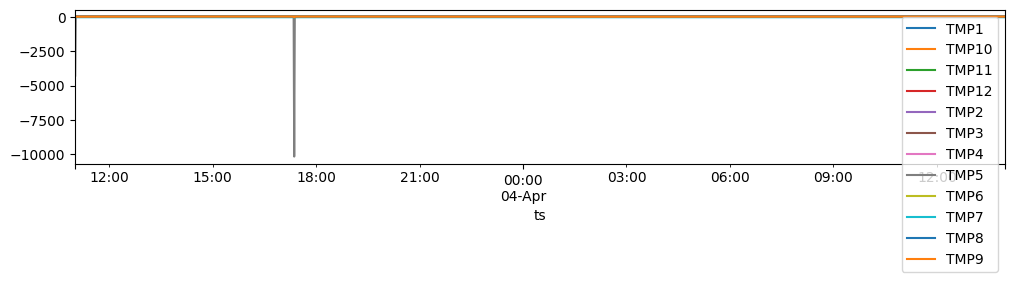

In [28]:
Text.plot(figsize=(12,2))

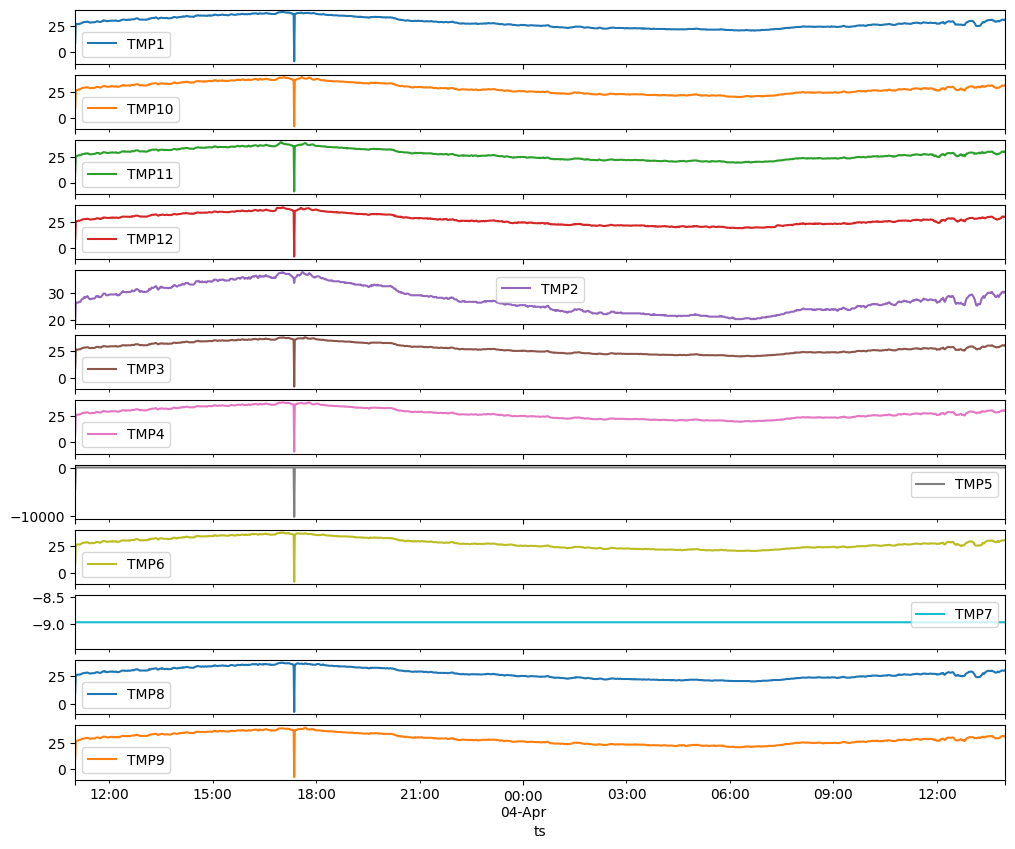

In [30]:
Text.plot(figsize=(12,10),subplots=True);

In [31]:
Text.describe()

,TMP1,TMP10,TMP11,TMP12,TMP2,TMP3,TMP4,TMP5,TMP6,TMP7,TMP8,TMP9
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1.619000e+03,1619.000000,1619.000000
mean,27.857400,28.032980,27.793535,27.359272,27.713543,27.501829,27.452916,18.674083,27.485951,-8.960000e+00,27.598910,28.734695
std,4.994949,5.186105,5.267671,5.321998,4.972734,5.060342,5.148783,275.614825,4.884075,1.776906e-15,4.898396,5.123670
min,-8.240000,-7.920000,-8.860000,-7.770000,19.270000,-8.540000,-8.780000,-10194.370000,-8.340000,-8.960000e+00,-7.440000,-7.800000
25%,23.840000,23.740000,23.470000,22.975000,23.470000,23.335000,23.240000,23.790000,23.490000,-8.960000e+00,23.530000,24.540000
50%,27.105000,27.305000,27.045000,26.570000,26.895000,26.755000,26.660000,27.065000,26.920000,-8.960000e+00,26.930000,27.960000
75%,32.250000,32.585000,32.335000,31.870000,32.030000,31.880000,31.940000,31.580000,31.600000,-8.960000e+00,31.890000,33.250000
max,37.850000,38.940000,40.105000,39.370000,37.940000,37.790000,37.850000,37.035000,37.370000,-8.960000e+00,37.460000,39.470000


# Limpieza de Text
1. Tirar TMP5
1. Tirar datos < 0
1. Renombrar columnas a T1, T2...
1. Resample cada 10 minutos con promedio

# Limpieza de Tcafe
1. Renombrar columnas a T1, T2...
1. Resample cada 10 minutos con promedio

# Ambos conjuntos, datos de 12 a 5pm 